In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os


plt.rc('font', size=12)  # Set default font size for all elements
plt.rc('axes', titlesize=16)  # Title font size
plt.rc('axes', labelsize=14)  # X and Y labels font size
plt.rc('xtick', labelsize=12)  # X tick labels font size
plt.rc('ytick', labelsize=12)  # Y tick labels font size
plt.rc('legend', fontsize=10)  # Legend font size
plt.rc('figure', titlesize=12)  # Figure title font size

In [1]:
PATH_TO_RESULTS = '/home/lgierz/BA_MothClassification/data/processed/results_specific/'


In [2]:

DATASET_CONFIGS = {
    'top277': (277, [3000, 2000, 1000, 500]),
    'top387': (387, [2000, 1000, 500]),
    'top589': (589, [1000, 500])
}

In [3]:

# Initialize an empty list to store dataframes
dfs = []

# Iterate over the foundational models
for fm in ['dino', 'resnet']:
    # Iterate over the dataset configurations
    for config_name, (species_amount, sample_amounts) in DATASET_CONFIGS.items():
        # Iterate over the sample amounts
        for sample_amount in sample_amounts:
            # Construct the file name
            file_name = f"{fm}_cv_test_top{species_amount}_max{sample_amount}.csv"
            file_path = os.path.join(PATH_TO_RESULTS, file_name)
            
            # Load the CSV file
            df = pd.read_csv(file_path)
            
            # Add the new columns
            df['FoundationalModel'] = 'DINOv2' if fm == 'dino' else 'ResNet50'
            df['SpeciesAmount'] = species_amount
            df['SampleAmount'] = sample_amount
            
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all dataframes into one
result_df = pd.concat(dfs, ignore_index=True)
result_df.shape

NameError: name 'os' is not defined

In [ ]:
#result_df.to_csv('/home/lgierz/BA_MothClassification/data/combined_results/cv_bestparams_alldatasets_180runs.csv', index=False)

In [ ]:
averaged_result_df = result_df.copy()

for metric in ['Validation Accuracies', 'Validation Losses']:

    validations_grouped = result_df[result_df['Model'] == 'Linear Classifier'].groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])[metric]

    for group in validations_grouped:
        # Extract the group key and the series of validation accuracies
        key, val_series = group
        
        # Initialize an array to store the sum of accuracies for each epoch
        avg = np.zeros(1500)
        
        # Iterate over the series and sum the accuracies for each epoch
        for val in val_series:
            avg += np.array(eval(val))
        
        # Calculate the average accuracies by dividing by the number of folds
        avg /= len(val_series)
        avg = np.round(avg, 4)


        # print(f"Group: {key}, Averaged Validation Accuracies: {avg_accs}")

        averaged_result_df.loc[(averaged_result_df['FoundationalModel'] == key[0]) & (averaged_result_df['SpeciesAmount'] == key[1]) & (averaged_result_df['SampleAmount'] == key[2]) & (averaged_result_df['Model'] == key[3]), metric] = str(list(avg))

### Std derivation in between folds

In [ ]:
averaged_result_df['Std Accuracy'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['Accuracy'].transform('std')
averaged_result_df['Mean Accuracy'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['Accuracy'].transform('mean')
averaged_result_df['Std Precision'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['Precision'].transform('std')
averaged_result_df['Mean Precision'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['Precision'].transform('mean')
averaged_result_df['Std Recall'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['Recall'].transform('std')
averaged_result_df['Mean Recall'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['Recall'].transform('mean')
averaged_result_df['Std F1-Score'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['F1-Score'].transform('std')
averaged_result_df['Mean F1-Score'] = result_df.groupby(['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model'])['F1-Score'].transform('mean')

# mean over all folds and 2 dataset types
averaged_result_df['Mean Training Time'] = result_df.groupby(['SpeciesAmount', 'SampleAmount', 'Model'])['Training Time (s)'].transform('mean')
averaged_result_df.drop(columns=['Training Time (s)', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Fold', 'Reduction Time (s)'], inplace=True)
#result_df_stripped = result_df[['FoundationalModel', 'SpeciesAmount', 'SampleAmount', 'Model', 'Fold', 'Training Time (s)', 'Mean Training Time', 'Mean Accuracy', 'Std Accuracy', 'Mean Precision', 'Std Precision', 'Mean Recall', 'Std Recall', 'Mean F1-Score', 'Std F1-Score']]
averaged_result_df = averaged_result_df[['SpeciesAmount', 'SampleAmount', 'FoundationalModel','Model', 'Mean Training Time', 'Mean Accuracy', 'Std Accuracy', 'Mean Precision', 'Std Precision', 'Mean Recall', 'Std Recall', 'Mean F1-Score', 'Std F1-Score', 'Validation Accuracies', 'Validation Losses']]
averaged_result_df = averaged_result_df.drop_duplicates().reset_index(drop=True)

In [ ]:
averaged_result_df.to_csv('/home/lgierz/BA_MothClassification/data/combined_results/cv_bestparams_alldatasets_180runs_averaged.csv', index=False)
averaged_result_df.sample(3)


,SpeciesAmount,SampleAmount,FoundationalModel,Model,Mean Training Time,Mean Accuracy,Std Accuracy,Mean Precision,Std Precision,Mean Recall,Std Recall,Mean F1-Score,Std F1-Score,Validation Accuracies,Validation Losses
1,277,3000,DINOv2,Linear Classifier,109.039489,0.927762,0.000752,0.928148,0.000722,0.927762,0.000752,0.927814,0.000746,"[0.0053, 0.0072, 0.0098, 0.0132, 0.0176, 0.023...","[5.9719, 5.8947, 5.8179, 5.7416, 5.6657, 5.590..."
4,277,1000,DINOv2,KNN,28.487927,0.704332,0.001792,0.713806,0.001830,0.704332,0.001792,0.703476,0.001795,NaN,NaN
14,589,1000,DINOv2,KNN,119.467747,0.654639,0.000680,0.669477,0.000861,0.654639,0.000680,0.654839,0.000720,NaN,NaN


In [ ]:

for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    #result_df_stripped_without_folds[f'CI {metric}'] = 1.96 * result_df_stripped_without_folds[f'Std {metric}'] / np.sqrt(10)
    print('Min Std of ' + metric, round(averaged_result_df['Std ' + metric].min(), 6))
    print('Mean Std of ' + metric, round(averaged_result_df['Mean ' + metric].mean(), 6), '+-', round(averaged_result_df['Std ' + metric].std(), 6))
    print('Max Std of ' + metric, round(averaged_result_df['Std ' + metric].max(), 6))
    print()


Min Std of Accuracy 0.000397
Mean Std of Accuracy 0.653631 +- 0.000681
Max Std of Accuracy 0.003218

Min Std of Precision 0.000688
Mean Std of Precision 0.662104 +- 0.000687
Max Std of Precision 0.003247

Min Std of Recall 0.000397
Mean Std of Recall 0.653631 +- 0.000681
Max Std of Recall 0.003218

Min Std of F1-Score 0.000648
Mean Std of F1-Score 0.651936 +- 0.000682
Max Std of F1-Score 0.003176



In [ ]:
averaged_result_df['Recall Gap'] = averaged_result_df['Mean Recall'] - averaged_result_df['Mean Accuracy']
averaged_result_df['Precision Gap'] = averaged_result_df['Mean Precision'] - averaged_result_df['Mean Accuracy']
averaged_result_df['F1-Score Gap'] = averaged_result_df['Mean F1-Score'] - averaged_result_df['Mean Accuracy']

In [ ]:
for metric in ['Precision', 'Recall', 'F1-Score']:
    #result_df_stripped_without_folds[f'CI {metric}'] = 1.96 * result_df_stripped_without_folds[f'Std {metric}'] / np.sqrt(10)
    print('Min Std of ' + metric + ' Gap', round(averaged_result_df[metric + ' Gap'].min(), 6))
    print('Mean Std of ' + metric + ' Gap', round(averaged_result_df[metric + ' Gap'].mean(), 6), '+-', round(averaged_result_df[metric + ' Gap'].std(), 6))
    print('Max Std of ' + metric + ' Gap', round(averaged_result_df[metric + ' Gap'].max(), 6))
    print()

Min Std of Precision Gap -0.001019
Mean Std of Precision Gap 0.008473 +- 0.008304
Max Std of Precision Gap 0.026217

Min Std of Recall Gap 0.0
Mean Std of Recall Gap 0.0 +- 0.0
Max Std of Recall Gap 0.0

Min Std of F1-Score Gap -0.0071
Mean Std of F1-Score Gap -0.001695 +- 0.002433
Max Std of F1-Score Gap 0.000835



In [ ]:
averaged_result_df['Std Accuracy'].mean()

0.001519271319677593

In [ ]:
#averaged_result_df.to_csv('/home/lgierz/BA_MothClassification/data/combined_results/cv_bestparams_alldatasets_180runs_averaged.csv', index=False)


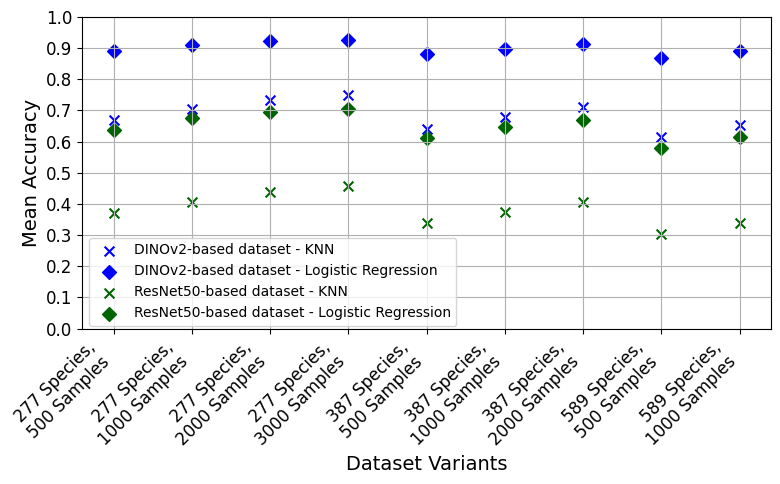

In [ ]:
# Define colors for the models
colors = {
    'DINOv2 - KNN': 'blue',
    'ResNet50 - KNN': 'darkgreen',
    'DINOv2 - Linear Classifier': 'blue',
    'ResNet50 - Linear Classifier': 'darkgreen'
}

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the lines for each combination of dataset variants and foundational models
for fm in ['DINOv2', 'ResNet50']:
    for model in ['KNN', 'Linear Classifier']:
        fakelabel = f'{fm} - {model}'
        color = colors[fakelabel]
        
        subset = averaged_result_df[(averaged_result_df['Model'] == model) & 
                                                  (averaged_result_df['FoundationalModel'] == fm)]
        
        # Sort the subset by SpeciesAmount and SampleAmount
        subset = subset.sort_values(['SpeciesAmount', 'SampleAmount'])
        
        # Adjust x-values for scatter points
        x_values = np.arange(len(subset))
        
        # Plot the mean accuracy
        ax.scatter(x_values, subset['Mean Accuracy'],
                   label=f'{fm}-based dataset - {"KNN" if model == "KNN" else "Logistic Regression"}',
                   color=color,
                   marker='x' if model == 'KNN' else 'D',
                   s=50)

# X-axis labels
xtick_labels = [f'{species} Species,\n{samples} Samples' for species, samples in zip(subset['SpeciesAmount'], subset['SampleAmount'])]

ax.set_xticks(np.arange(len(xtick_labels)))
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

# Labels and title
ax.set_xlabel('Dataset Variants')
ax.set_ylabel('Mean Accuracy')

# Legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), loc='center left', bbox_to_anchor=(0, 0.15))

plt.yticks(np.arange(0, 1.05, 0.1))
plt.tight_layout()
plt.grid()
plt.show()


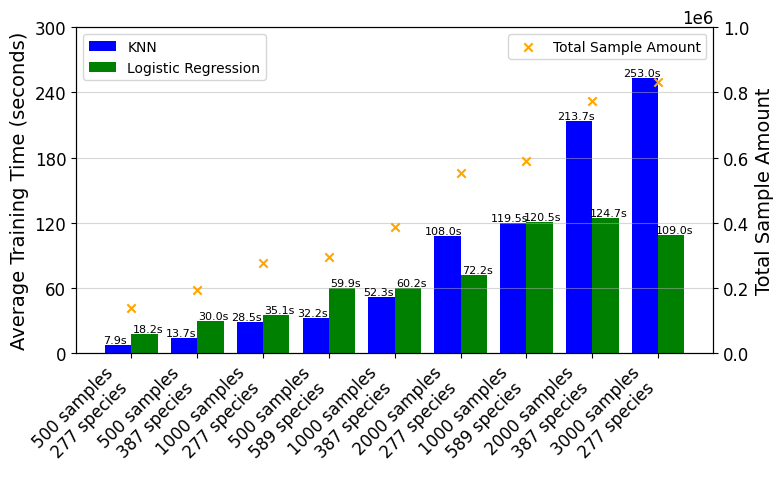

In [ ]:

# Create a bar plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Define colors for the models
colors = {
    'KNN': 'blue',
    'Linear Classifier': 'green'
}

# Calculate total samples
averaged_result_df['Total Samples'] = averaged_result_df['SpeciesAmount'] * averaged_result_df['SampleAmount']

# Sort the data by total samples
avg_training_time = averaged_result_df[['SpeciesAmount', 'SampleAmount', 'Total Samples', 'Model', 'Mean Training Time']].sort_values(by='Total Samples').drop_duplicates()

# Plot bars for KNN
knn_data = avg_training_time[avg_training_time['Model'] == 'KNN']

# Calculate the bar width and positions
bar_width = 0.4
positions = np.arange(len(knn_data))

bars_knn = ax1.bar(positions - bar_width/2, knn_data['Mean Training Time'], bar_width, label='KNN', color=colors['KNN'])

# Plot bars for Linear Classifier
linear_data = avg_training_time[avg_training_time['Model'] == 'Linear Classifier']
bars_linear = ax1.bar(positions + bar_width/2, linear_data['Mean Training Time'], bar_width, label='Logistic Regression', color=colors['Linear Classifier'])

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot orange dots for total samples
ax2.scatter(positions, knn_data['Total Samples'], color='orange', zorder=5, label='Total Sample Amount', marker='x')

# Set the y-axis limits and ticks
ax1.set_ylim(0, 300)
ax2.set_ylim(0, 1_000_000)
ax1.set_yticks(np.arange(0, 301, 60))
ax2.set_yticks(np.arange(0, 1_000_001, 200_000))

# Customize the plot
ax1.set_ylabel('Average Training Time (seconds)')
ax2.set_ylabel('Total Sample Amount')
ax1.set_xticks(positions)
ax1.set_xticklabels([f"{row['SampleAmount']} samples\n{row['SpeciesAmount']} species" 
                    for _, row in knn_data.iterrows()], 
                   rotation=45, ha='right')

ax1.grid(True, axis='y', alpha=0.5)

# Add value labels on top of each bar
for idx, bars in enumerate([bars_knn, bars_linear]):
    offset = -0.05 if idx == 0 else 0.05

    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2. + offset, height,
                f'{height:.1f}s',
                ha='center', va='bottom', size=8)

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


### Impact of Amount of Species

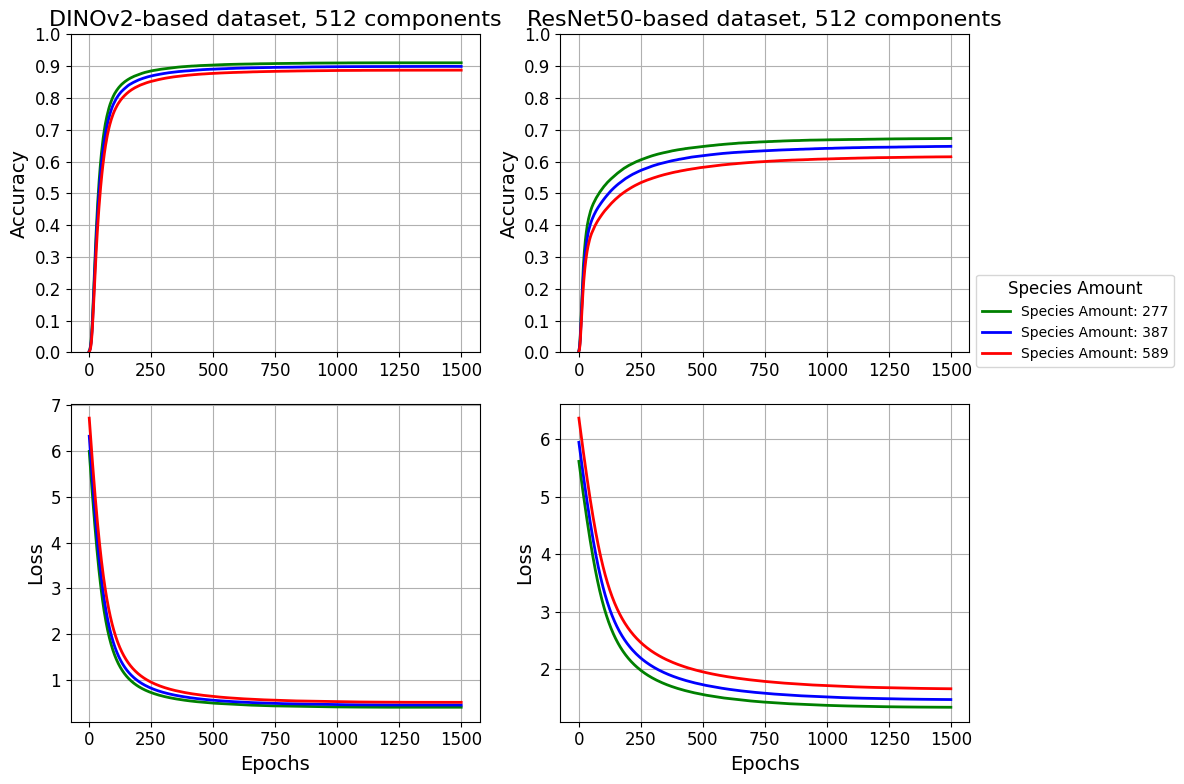

In [ ]:
dino_df = averaged_result_df[(averaged_result_df['FoundationalModel'] == 'DINOv2') & (averaged_result_df['Model'] == 'Linear Classifier')]
resnet_df = averaged_result_df[(averaged_result_df['FoundationalModel'] == 'ResNet50') & (averaged_result_df['Model'] == 'Linear Classifier')]

# Define colors for the species amounts
species_colors = {
    277: 'green',
    387: 'blue',
    589: 'red'
}

# Create the plot
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy for DINO
for i, row in dino_df[dino_df['SampleAmount'] == 1000].iterrows():
    epoch_accuracies = eval(row['Validation Accuracies'])
    epochs = range(1, len(epoch_accuracies) + 1)
    ax1.plot(epochs, epoch_accuracies, label=f'Species Amount: {row["SpeciesAmount"]}', color=species_colors[row['SpeciesAmount']], linewidth=2)

# Plot loss for DINO
for i, row in dino_df[dino_df['SampleAmount'] == 1000].iterrows():
    epoch_losses = eval(row['Validation Losses'])
    epochs = range(1, len(epoch_losses) + 1)
    ax2.plot(epochs, epoch_losses, label=f'Species Amount: {row["SpeciesAmount"]}', color=species_colors[row['SpeciesAmount']], linewidth=2)

# Plot accuracy for ResNet50
for i, row in resnet_df[resnet_df['SampleAmount'] == 1000].iterrows():
    epoch_accuracies = eval(row['Validation Accuracies'])
    epochs = range(1, len(epoch_accuracies) + 1)
    ax3.plot(epochs, epoch_accuracies, label=f'Species Amount: {row["SpeciesAmount"]}', color=species_colors[row['SpeciesAmount']], linewidth=2)

# Plot loss for ResNet50
for i, row in resnet_df[resnet_df['SampleAmount'] == 1000].iterrows():
    epoch_losses = eval(row['Validation Losses'])
    epochs = range(1, len(epoch_losses) + 1)
    ax4.plot(epochs, epoch_losses, label=f'Species Amount: {row["SpeciesAmount"]}', color=species_colors[row['SpeciesAmount']], linewidth=2)

# Labels and title for DINO
ax1.set_title('DINOv2-based dataset, 512 components')
ax1.set_ylabel('Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

# Labels and title for ResNet50
ax3.set_title('ResNet50-based dataset, 512 components')
ax3.set_ylabel('Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Loss')

# Set y-axis limits and grid for accuracy plots
ax1.set_ylim(0, 1)
ax3.set_ylim(0, 1)
ax1.grid(True)
ax3.grid(True)
ax1.set_yticks(np.arange(0, 1.05, 0.1))
ax3.set_yticks(np.arange(0, 1.05, 0.1))

# Set grid for loss plots
ax2.grid(True)
ax4.grid(True)

# Add legend
ax3.legend(title='Species Amount', loc='center left', bbox_to_anchor=(1.0, 0.1))

plt.tight_layout()
plt.show()

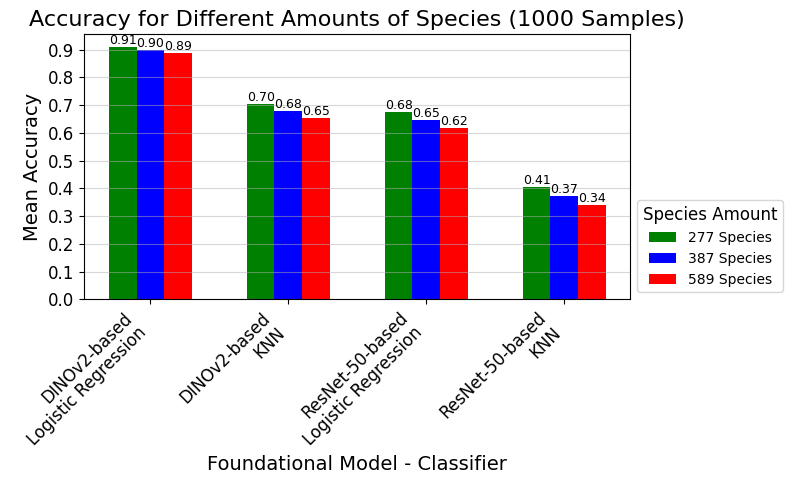

In [ ]:
# Filter the dataframe for the sample amount of 1000
filtered_df = averaged_result_df[averaged_result_df['SampleAmount'] == 1000]

# Define colors for the species amounts
species_colors = {
    277: 'green',
    387: 'blue',
    589: 'red'
}

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Define the width of each bar
bar_width = 0.2

# Get unique species amounts and models
species_amounts = filtered_df['SpeciesAmount'].unique()
models = ['Linear Classifier', 'KNN']
foundational_models = ['DINOv2', 'ResNet50']

# Calculate the positions for each bar
positions = np.arange(len(foundational_models) * len(models))

# Plot bars for each combination of foundational model and classifier
for i, species_amount in enumerate(species_amounts):
    subset = filtered_df[filtered_df['SpeciesAmount'] == species_amount]
    for j, model in enumerate(models):
        for k, fm in enumerate(foundational_models):
            label = f'{fm} - {model}'
            subset_model = subset[(subset['FoundationalModel'] == fm) & (subset['Model'] == model)]
            bar_position = positions[k * len(models) + j] + i * bar_width
            bar = ax.bar(bar_position, subset_model['Mean Accuracy'].values[0], bar_width, color=species_colors[species_amount], label=f'{species_amount} Species' if j == 0 and k == 0 else "")
            # Add text on top of each bar
            ax.text(bar_position, subset_model['Mean Accuracy'].values[0], f'{subset_model["Mean Accuracy"].values[0]:.2f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
ax.set_xlabel('Foundational Model - Classifier')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Accuracy for Different Amounts of Species (1000 Samples)')
ax.set_xticks(positions + bar_width)
ax.set_xticklabels([f"{fm if fm == 'DINOv2' else 'ResNet-50'}-based\n{model if model == 'KNN' else 'Logistic Regression'}" for fm in foundational_models for model in models], rotation=45, ha='right')
ax.legend(title='Species Amount', bbox_to_anchor=(1.0, 0.4))

# Add horizontal grid with a step of 0.1 accuracy
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()


### Impact of Amount of Samples per Species

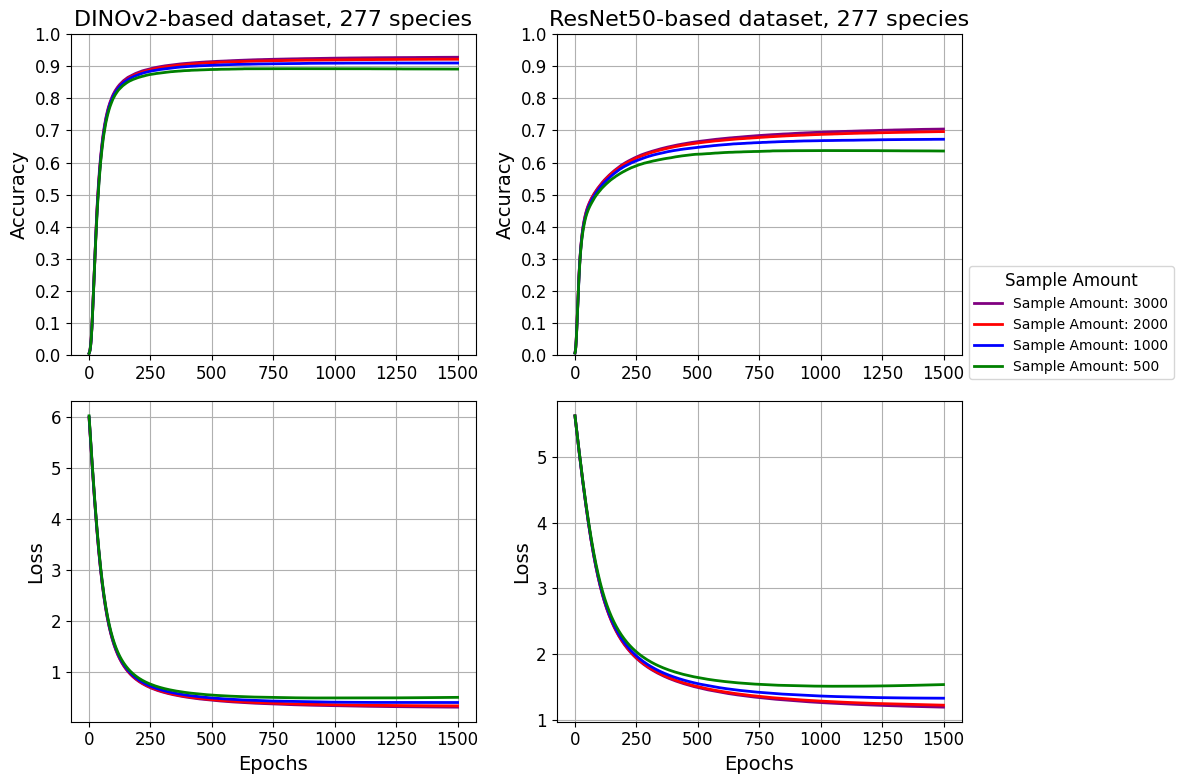

In [ ]:
dino_df = averaged_result_df[(averaged_result_df['FoundationalModel'] == 'DINOv2') & 
                             (averaged_result_df['Model'] == 'Linear Classifier') & 
                             (averaged_result_df['SpeciesAmount'] == 277)]
resnet_df = averaged_result_df[(averaged_result_df['FoundationalModel'] == 'ResNet50') & 
                               (averaged_result_df['Model'] == 'Linear Classifier') & 
                               (averaged_result_df['SpeciesAmount'] == 277)]

# Define colors for the sample amounts
sample_colors = {
    500: 'green',
    1000: 'blue',
    2000: 'red',
    3000: 'purple'
}

# Create the plot
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy for DINO
for i, row in dino_df.iterrows():
    epoch_accuracies = eval(row['Validation Accuracies'])
    epochs = range(1, len(epoch_accuracies) + 1)
    ax1.plot(epochs, epoch_accuracies, label=f'Sample Amount: {row["SampleAmount"]}', color=sample_colors[row['SampleAmount']], linewidth=2)

# Plot loss for DINO
for i, row in dino_df.iterrows():
    epoch_losses = eval(row['Validation Losses'])
    epochs = range(1, len(epoch_losses) + 1)
    ax2.plot(epochs, epoch_losses, label=f'Sample Amount: {row["SampleAmount"]}', color=sample_colors[row['SampleAmount']], linewidth=2)

# Plot accuracy for ResNet50
for i, row in resnet_df.iterrows():
    epoch_accuracies = eval(row['Validation Accuracies'])
    epochs = range(1, len(epoch_accuracies) + 1)
    ax3.plot(epochs, epoch_accuracies, label=f'Sample Amount: {row["SampleAmount"]}', color=sample_colors[row['SampleAmount']], linewidth=2)

# Plot loss for ResNet50
for i, row in resnet_df.iterrows():
    epoch_losses = eval(row['Validation Losses'])
    epochs = range(1, len(epoch_losses) + 1)
    ax4.plot(epochs, epoch_losses, label=f'Sample Amount: {row["SampleAmount"]}', color=sample_colors[row['SampleAmount']], linewidth=2)

# Labels and title for DINO
ax1.set_title('DINOv2-based dataset, 277 species')
ax1.set_ylabel('Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

# Labels and title for ResNet50
ax3.set_title('ResNet50-based dataset, 277 species')
ax3.set_ylabel('Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Loss')

# Set y-axis limits and grid for accuracy plots
ax1.set_ylim(0, 1)
ax3.set_ylim(0, 1)
ax1.grid(True)
ax3.grid(True)
ax1.set_yticks(np.arange(0, 1.05, 0.1))
ax3.set_yticks(np.arange(0, 1.05, 0.1))

# Set grid for loss plots
ax2.grid(True)
ax4.grid(True)

# Add legend
ax3.legend(title='Sample Amount', loc='center left', bbox_to_anchor=(1.0, 0.1))

plt.tight_layout()
plt.show()

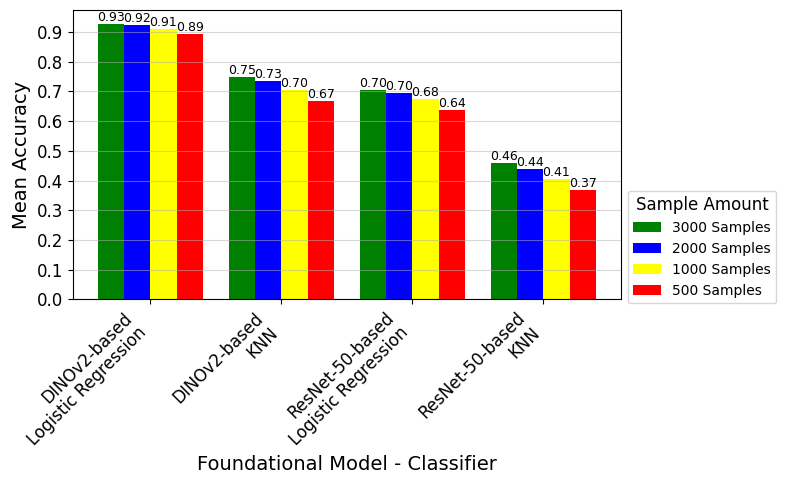

In [ ]:
# Filter the dataframe for the species amount of 277
filtered_df = averaged_result_df[averaged_result_df['SpeciesAmount'] == 277]

# Define colors for the sample amounts
sample_colors = {
    500: 'red',
    1000: 'yellow',
    2000: 'blue',
    3000: 'green'
}

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Define the width of each bar
bar_width = 0.2

# Get unique sample amounts and models
sample_amounts = filtered_df['SampleAmount'].unique()
models = ['Linear Classifier', 'KNN']
foundational_models = ['DINOv2', 'ResNet50']

# Calculate the positions for each bar
positions = np.arange(len(foundational_models) * len(models))

# Plot bars for each combination of foundational model and classifier
for i, sample_amount in enumerate(sample_amounts):
    subset = filtered_df[filtered_df['SampleAmount'] == sample_amount]
    for j, model in enumerate(models):
        for k, fm in enumerate(foundational_models):
            label = f'{fm} - {model}'
            subset_model = subset[(subset['FoundationalModel'] == fm) & (subset['Model'] == model)]
            bar_position = positions[k * len(models) + j] + i * bar_width
            bar = ax.bar(bar_position, subset_model['Mean Accuracy'].values[0], bar_width, color=sample_colors[sample_amount], label=f'{sample_amount} Samples' if j == 0 and k == 0 else "")
            # Add text on top of each bar
            ax.text(bar_position, subset_model['Mean Accuracy'].values[0], f'{subset_model["Mean Accuracy"].values[0]:.2f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
ax.set_xlabel('Foundational Model - Classifier')
ax.set_ylabel('Mean Accuracy')
#ax.set_title('Accuracy for Different Amounts of Samples (277 Species)')
ax.set_xticks(positions + (len(sample_amounts) - 1) * bar_width / 2)
ax.set_xticklabels([f"{fm if fm=='DINOv2' else 'ResNet-50'}-based\n{model if model == 'KNN' else 'Logistic Regression'}" for fm in foundational_models for model in models], rotation=45, ha='right')
ax.legend(title='Sample Amount', bbox_to_anchor=(1.0, 0.4))

# Add horizontal grid with a step of 0.1 accuracy
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()


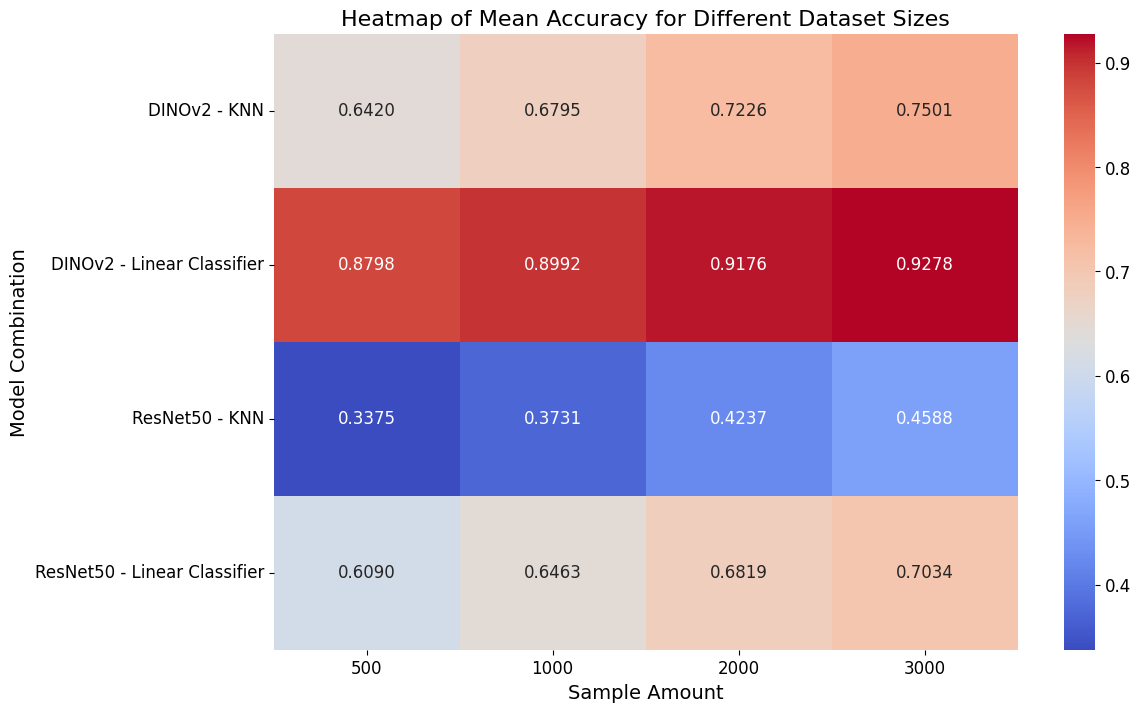

In [ ]:
import seaborn as sns

# Create a new column for the foundational model-model combination
averaged_result_df['Model_Combination'] = averaged_result_df['FoundationalModel'] + ' - ' + averaged_result_df['Model']

# Define the desired order
desired_order = ['DINOv2 - Linear Classifier', 'DINOv2 - KNN', 'ResNet50 - Linear Classifier', 'ResNet50 - KNN']

# Pivot the dataframe to create a matrix for the heatmap
heatmap_data = averaged_result_df.pivot_table(
    index='Model_Combination', 
    columns='SampleAmount', 
    values='Mean Accuracy'
)

# Reindex the heatmap data to match the desired order
heatmap_data = heatmap_data.reindex(desired_order)

# Calculate the differences in accuracy (gain) compared to the smaller sample amount
heatmap_diff = heatmap_data.diff(axis=1).fillna(0)

# Combine the accuracy and the delta into a single string for each cell
heatmap_combined = heatmap_data.astype(str) + '\n(' + heatmap_diff.round(4).astype(str) + ')'
print(heatmap_combined)
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=heatmap_combined, cmap='coolwarm', fmt='')
print('x')

# Customize the plot
plt.title('Heatmap of Accuracy and Accuracy Gain for Different Dataset Sizes')
plt.xlabel('Sample Amount')
plt.ylabel('Model Combination')
plt.show()